**This notebook goes along with convnet_devp3.py. It records different running results by executing convnet_devp3.py with different parameter settings. The main difference btw convnet_devp3.py and convnet_devp2.py is that it adds in Batch Normalization layers and l2 regularization**

In [1]:
import numpy as np
#import tensorflow as tf
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline
# Add search path
import sys
sys.path.append('../code')
from prepare_input import unpickle

/Users/Zhongyu/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def plot_data(data):
    epoch = range(data['train_losses'].shape[0])
    plt.subplot(211)
    plt.plot(epoch, data['train_losses'], label= 'training loss')
    plt.plot(epoch, data['valid_losses'], label='validation loss')
    plt.ylim([-.1,4])
    plt.legend(loc='upper right')
    plt.subplot(212)
    plt.plot(epoch, data['train_acc'], label='training accuracy')
    plt.plot(epoch, data['valid_acc'], label='validation accuracy')
    plt.ylim([0.0, 1.1])
    plt.legend(loc='lower right')
    plt.show()

In [6]:
def train_data_summary(filename):
    data = unpickle(filename)
    plot_data(data)
    print "Final Valid Accuracy: %.4f \t Test Accuracy: %.4f" %(data['valid_acc'][-1], data['test_acc'])

***
**Trial 1**
* architecture: 
    * conv1(filterSize=5, numOfFilter=16) -> BN -> ReLu -> max pool ->
    * conv2(filterSize=3, numOfFilter=16) -> BN -> ReLu -> max pool -> 
    * conv3(filterSize=5, numOfFilter=16) -> BN -> ReLu -> max pool -> 
    * fc1(512 neurons) -> BN -> ReLu -> Dropout -> 
    * fc2 -> BN -> ReLu -> Softmax Classifier
* keep prob: 0.47
* L2 Reg: Not applied
* weight initialization std: 0.015
* learning rate: 0.005, decay rate=.9, decay steps=100, staircase=True
* data augmentation: yes
* total training steps: 2500
* MiniBatch Size: 512
* time per epoch: 28 sec
* Optimizer: AdamOptimizer

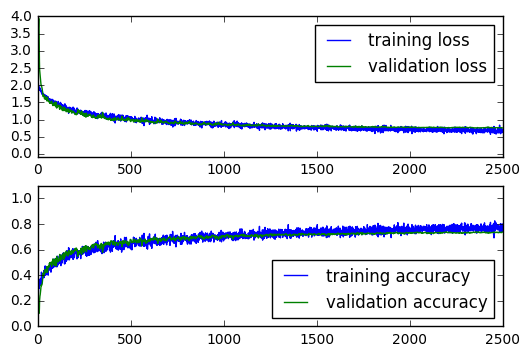

Final Valid Accuracy: 0.7367 	 Test Accuracy: 0.7316


In [7]:
trial1_filename = '../train_data/training_data_stack3.1'
train_data_summary(trial1_filename)

**Trial 2**
* architecture: 
    * conv1(filterSize=5, numOfFilter=16) -> BN -> ReLu -> max pool ->
    * conv2(filterSize=3, numOfFilter=16) -> BN -> ReLu -> max pool -> 
    * conv3(filterSize=5, numOfFilter=16) -> BN -> ReLu -> max pool -> 
    * fc1(512 neurons) -> BN -> ReLu -> Dropout -> 
    * fc2 -> BN -> ReLu -> Softmax Classifier
* keep prob: 0.33
* L2 Reg: 0.096
* weight initialization std: 0.015
* learning rate: 0.005, decay rate=.95, decay steps=500, staircase=False
* data augmentation: yes
* total training steps: 2500
* MiniBatch Size: 512
* time per epoch: 28 sec
* Optimizer: AdamOptimizer